# Notebook IV - Soil Constraints

<hr>
This module, after applying climatic constraints, will be continued to apply yield reduction due to soil constraints. Soil constraints works with combination of seven soil qualities into soil ratings (a single yield reduction factor). This module works with soil properties provided from soil map and each soil mapping unit's unique physical and chemical properties, and LUT-specific soil suitability
rating as excel sheets

<hr>

## Set Up

First, install any additional python packages that required to run PyAEZ.
If working on your own PC/machine, these additional installation will vary depending on what is already installed in your Python library. 

In [51]:
'''import supporting libraries'''
# import pyaez
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
try:
    from osgeo import gdal
except:
    import gdal
import sys

Set up the working directory where the PyAEZ project is located.

In [52]:
'Set the working directory'
work_dir = r'/Users/ming-mayhu/Desktop/毕业论文/qtp-pyaez/qtp_pyaez' # Please change this to your working directory
os.chdir(work_dir)
os.getcwd()


'/Users/ming-mayhu/Desktop/毕业论文/qtp-pyaez/qtp_pyaez'

Check and create data output folder.

In [53]:
'Create output folder if it does not exist'
import os
folder_path = './data_output/module4/'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print("Folder created successfully.")
else:
    print("Folder already exists.")

Folder already exists.


<hr>

## MODULE 2: SOIL CONSTRAINTS
Now, we will start executing the routines in Module 4


First, we initiate Module 2 Class instance by invoking the following commands:

First, initiate the Module 1 Class instance.

In [54]:
'''importing library'''


from pyaez import SoilConstraints
soil_constraints = SoilConstraints.SoilConstraints()

from pyaez import UtilitiesCalc
obj_utilities = UtilitiesCalc.UtilitiesCalc()

%load_ext autoreload
%autoreload 2
# Import Module 4 and initate Class intance


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
'''reading data'''
basefilepath = r'/Volumes/thesisDrive/Input Data/qilian admin mask.tif'

yield_map_rain = gdal.Open(r'./data_output/module2/barley/1979/yield_map_rain.tif').ReadAsArray()

soil_map = gdal.Open(r'/Volumes/thesisDrive/Input Data/hwsd.tif').ReadAsArray()

In [97]:
soil_constraints.importSoilReductionSheet(rain_sheet_path=r'./data_input/soil_inputs/winter_barley_soil.xlsx',
                             irr_sheet_path=r'./data_input/soil_inputs/winter_barley_soil.xlsx') # I: Irrigated, R: Rain-fed


In [109]:
'''calculate soil qualities and ratings and applying soil constraints - Rain-fed'''
soc_np = np.stack([
    np.load('./data_input/soc/soc_pct_d1.npy'),
    np.load('./data_input/soc/soc_pct_d2.npy'),
    np.load('./data_input/soc/soc_pct_d3.npy'),
    np.load('./data_input/soc/soc_pct_d4.npy'),
    np.load('./data_input/soc/soc_pct_d5.npy'),
    np.load('./data_input/soc/soc_pct_d6.npy'),
    np.load('./data_input/soc/soc_pct_d7.npy'),
], axis=2)


soil_constraints.calculateSoilQualities(irr_or_rain='R', topsoil_path= r'./data_input/soil_inputs/qtp_topsoil.xlsx',
                                         subsoil_path= r'./data_input/soil_inputs/qtp_subsoil.xlsx', soc=soc_np, soil_map=soil_map) # I: Irrigated, R: Rain-fed

# Calculate Soil rating for each SMU at a given input/management level
soil_constraints.calculateSoilRatings('L') # L: Low, I: Intermediate, H: High input

In [110]:
np.set_printoptions(precision = 2)
# result as pandas array
soil_constraints.getSoilQualities()

array([[[0.4 , 0.82, 1.  , ..., 0.83, 0.15, 0.46],
        [0.4 , 0.82, 1.  , ..., 0.83, 0.15, 0.46],
        [0.4 , 0.82, 1.  , ..., 0.83, 0.15, 0.46],
        ...,
        [0.34, 0.71, 1.  , ..., 1.  , 1.  , 0.46],
        [0.4 , 0.82, 1.  , ..., 0.78, 0.24, 0.46],
        [0.39, 0.81, 0.6 , ..., 0.95, 0.61, 0.4 ]],

       [[0.4 , 0.82, 1.  , ..., 0.78, 0.24, 0.46],
        [0.4 , 0.82, 1.  , ..., 0.78, 0.24, 0.46],
        [0.4 , 0.82, 1.  , ..., 0.78, 0.24, 0.46],
        ...,
        [0.4 , 0.82, 1.  , ..., 0.78, 0.24, 0.46],
        [0.39, 0.81, 0.6 , ..., 0.95, 0.61, 0.4 ],
        [0.79, 0.94, 1.  , ..., 1.  , 0.87, 0.46]],

       [[0.4 , 0.81, 1.  , ..., 1.  , 0.36, 0.46],
        [0.4 , 0.82, 1.  , ..., 0.78, 0.24, 0.46],
        [0.4 , 0.82, 1.  , ..., 0.78, 0.24, 0.46],
        ...,
        [0.4 , 0.82, 1.  , ..., 0.78, 0.24, 0.46],
        [0.4 , 0.82, 1.  , ..., 0.78, 0.24, 0.46],
        [0.4 , 0.82, 1.  , ..., 0.78, 0.24, 0.46]],

       ...,

       [[0.82, 0.95, 1. 

In [111]:
soil_constraints.calculateSoilRatings(input_level= 'L')


# 1st column: SMUs, 2nd column, soil constraint factors
print(soil_constraints.getSoilRatings())

[[0.19 0.19 0.19 ... 0.28 0.21 0.16]
 [0.21 0.21 0.21 ... 0.21 0.16 0.61]
 [0.26 0.21 0.21 ... 0.21 0.21 0.21]
 ...
 [0.64 0.64 0.64 ... 0.28 0.31 0.31]
 [0.64 0.64 0.64 ... 0.19 0.22 0.31]
 [0.64 0.64 0.62 ... 0.3  0.25 0.18]]


In [112]:
# getting the soil ratings
soil_constraints.getSoilRatings()

array([[0.19, 0.19, 0.19, ..., 0.28, 0.21, 0.16],
       [0.21, 0.21, 0.21, ..., 0.21, 0.16, 0.61],
       [0.26, 0.21, 0.21, ..., 0.21, 0.21, 0.21],
       ...,
       [0.64, 0.64, 0.64, ..., 0.28, 0.31, 0.31],
       [0.64, 0.64, 0.64, ..., 0.19, 0.22, 0.31],
       [0.64, 0.64, 0.62, ..., 0.3 , 0.25, 0.18]], dtype=float32)

In [127]:
yield_map_rain_m4 = soil_constraints.applySoilConstraints(yield_map_rain)

## get classified output
yield_map_rain_class_m4 = obj_utilities.classifyFinalYield(yield_map_rain_m4)

fc4_rain = soil_constraints.getSoilSuitabilityMap()

Text(0.5, 1.0, 'Soil Constraint Factor (fc4) Rainfed')

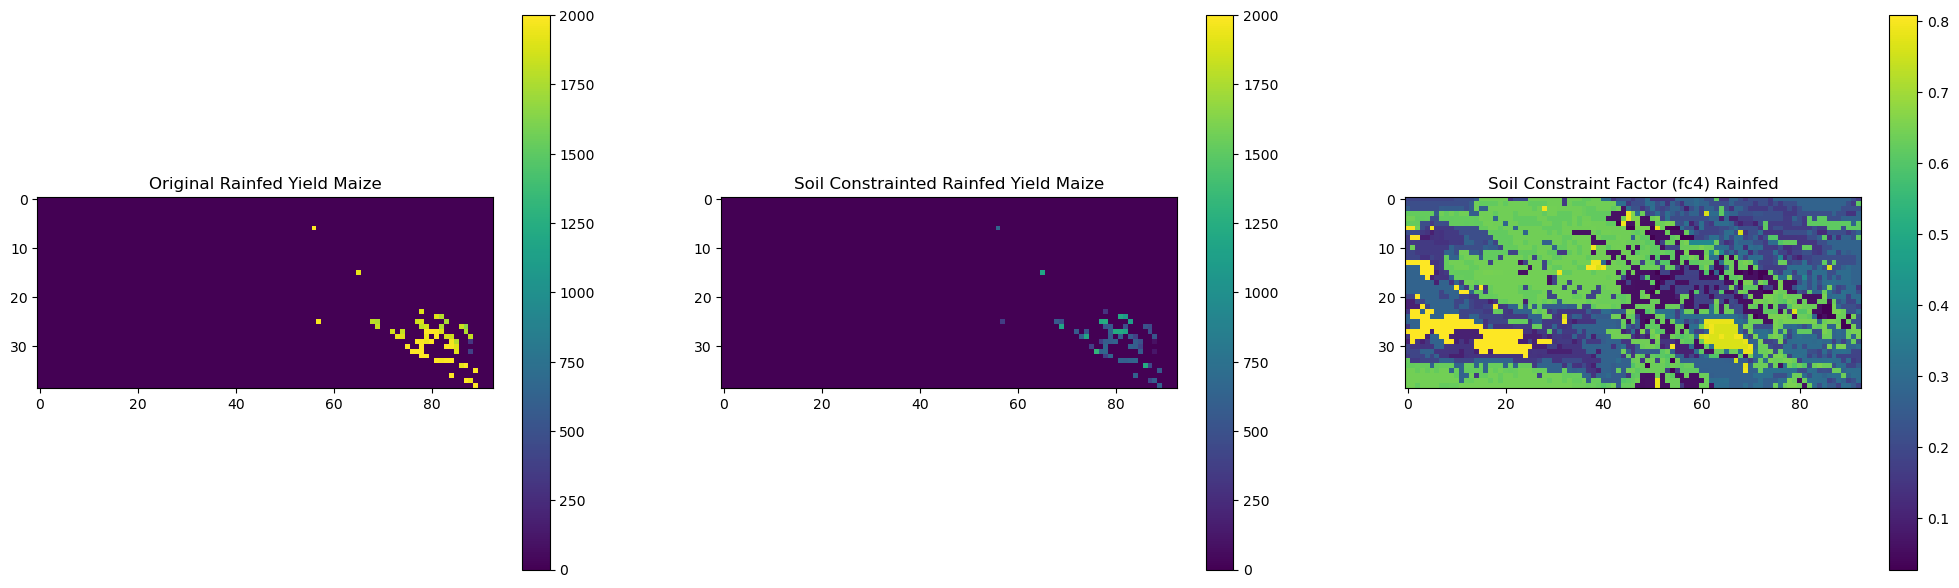

In [129]:
'''visualize results'''
plt.figure(1, figsize=(25,9))
plt.subplot(1,3,1)
plt.imshow(yield_map_rain, vmin=0, vmax = 2000)
plt.colorbar(shrink=0.8)
plt.title('Original Rainfed Yield Maize')

plt.subplot(1,3,2)
plt.imshow(yield_map_rain_m4, vmin= 0, vmax=2000)
plt.colorbar(shrink=0.8)
plt.title('Soil Constrainted Rainfed Yield Maize')

plt.subplot(1,3,3)
plt.imshow(fc4_rain,)
plt.colorbar(shrink=0.8)
plt.title('Soil Constraint Factor (fc4) Rainfed')


In [126]:
# ''save result'''

obj_utilities.saveRaster(basefilepath, './data_output/module4/barley_soil_yield.tif', yield_map_rain_m4)
# obj_utilities.saveRaster(basefilepath, './data_output/NB4/maiz_fc4_rain.tif', fc4_rain)

Text(0.5, 1.0, 'Soil Constraint Factor (fc4) Rainfed')

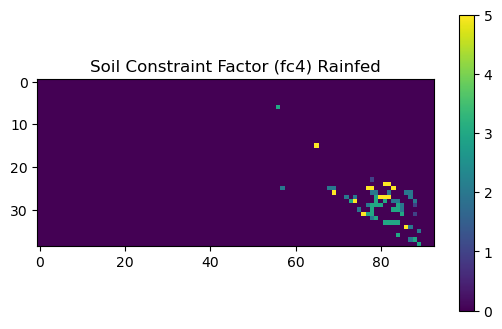

In [130]:

plt.imshow(yield_map_rain_class_m4,)
plt.colorbar(shrink=0.8)
plt.title('Soil Constraint Factor (fc4) Rainfed')
